<a href="https://colab.research.google.com/github/PuspitoMA/PCVK_Genap_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


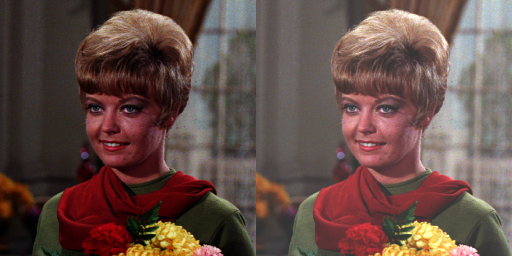

In [8]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try :
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Semester 6/PCVK_MM/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukkan tingkat kecerahan [-255 - 255] : 60
Masukkan kontras [1.0 - 3.0] : 1.5


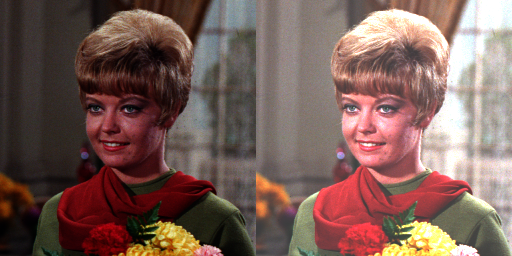

In [33]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')
try :
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255] : '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0] : '))
except ValueError:
  print('Error, not a number')

original1 = cv.imread('/content/drive/MyDrive/Semester 6/PCVK_MM/Images/female.tiff')
brightness_image1 = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image1[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image1))
cv2_imshow(final_frame)

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukkan nilai kecerahan : 40


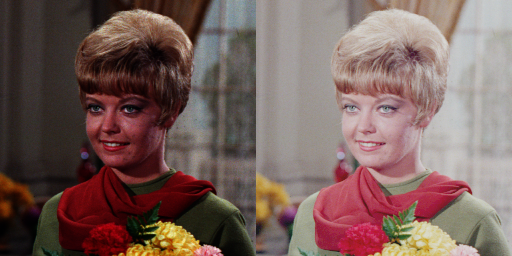

In [35]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------------------')
try :
  brightness = int(input('Masukkan nilai kecerahan : '))
except ValueError:
  print('Error, not a number')

original2 = cv.imread('/content/drive/MyDrive/Semester 6/PCVK_MM/Images/female.tiff')
brightness_image2 = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image2[y,x,c] = np.clip(brightness*(np.log(1+original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, brightness_image2))
cv2_imshow(final_frame)

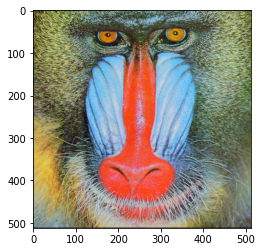

In [25]:
img = cv.imread('/content/drive/MyDrive/Semester 6/PCVK_MM/Images/mandrill.tiff')
img2 = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img2)


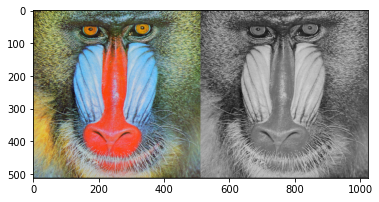

In [29]:
img3 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)

x,y,z=img3.shape 
## where z is the RGB dimension

### Method block begin 
img3[:] = img3.mean(axis=-1,keepdims=1) 

### Method Block ends 
final_frame = cv.hconcat((img2, img3))
plt.imshow(final_frame)

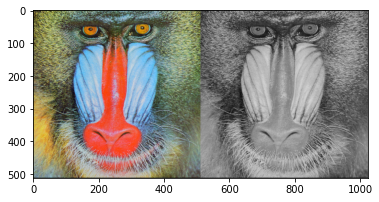

In [27]:
img4 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)

img4[:] = np.max(img4,axis=-1,keepdims=1)/2+np.min(img4,axis=-1,keepdims=1)/2
final_frame = cv.hconcat((img2, img4))
plt.imshow(final_frame)

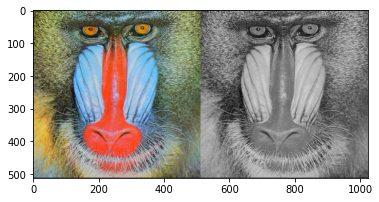

In [28]:
img5 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)

W = [0.2,0.5,0.3] # weights
W_mean = np.tensordot(img5,W, axes=((-1,-1)))[...,None]
img5[:] = W_mean.astype(img5.dtype)
final_frame = cv.hconcat((img2, img5))
plt.imshow(final_frame)

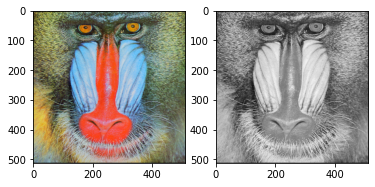

In [62]:
img6 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)

#extract the three channels
R, G, B = img6[:,:,0], img6[:,:,1],img6[:,:,2]

average_img = np.mean(img6, axis=2)
#print(average_img)
fig, axs = plt.subplots(1, 2)

axs[0].imshow(img2)
axs[1].imshow(average_img, cmap='gray')

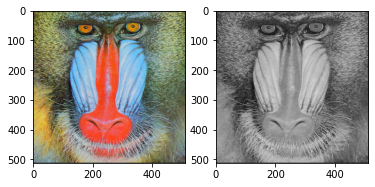

In [100]:
img8 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)

R, G, B = img6[:,:,0], img6[:,:,1],img6[:,:,2]

img8[:] = (np.max(img8,axis=-1,keepdims=1))/2 + (np.min(img8,axis=-1,keepdims=1))/2
#print(light_img)
fig, axs = plt.subplots(1, 2)

axs[0].imshow(img2)
axs[1].imshow(img8, cmap='gray')

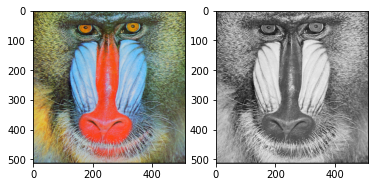

In [65]:
luminan_img = 0.21 * R + 0.72 * G + 0.07 * B

#print(luminance_img)
fig, axs = plt.subplots(1, 2)

axs[0].imshow(img2)
axs[1].imshow(luminan_img, cmap='gray')